<a href="https://colab.research.google.com/github/JoaquinGonzalezSimon/Data_science_and_ML_from_Medium/blob/main/221209_Weather_Forecasting_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This project was taken from the following link and I use it to practice my skills

https://thecleverprogrammer.com/2022/10/17/weather-forecasting-using-python/

In [38]:
pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [54]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from google.colab import files
import io

from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

In [13]:
uploads = files.upload()

Saving DailyDelhiClimateTest.csv to DailyDelhiClimateTest (1).csv
Saving DailyDelhiClimateTrain.csv to DailyDelhiClimateTrain (1).csv


In [14]:
train = pd.read_csv(io.BytesIO(uploads['DailyDelhiClimateTrain.csv']))
train.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [15]:
test = pd.read_csv(io.BytesIO(uploads['DailyDelhiClimateTest.csv']))
test.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [17]:
train['date'] = pd.to_datetime(train['date'])

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1462 non-null   datetime64[ns]
 1   meantemp      1462 non-null   float64       
 2   humidity      1462 non-null   float64       
 3   wind_speed    1462 non-null   float64       
 4   meanpressure  1462 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 57.2 KB


In [19]:
test['date'] = test['date'].astype('datetime64[ns]')

In [20]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          114 non-null    datetime64[ns]
 1   meantemp      114 non-null    float64       
 2   humidity      114 non-null    float64       
 3   wind_speed    114 non-null    float64       
 4   meanpressure  114 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 4.6 KB


In [21]:
fig = px.line(train, x='date', y='meantemp', title='Mean temperature')
fig.show()

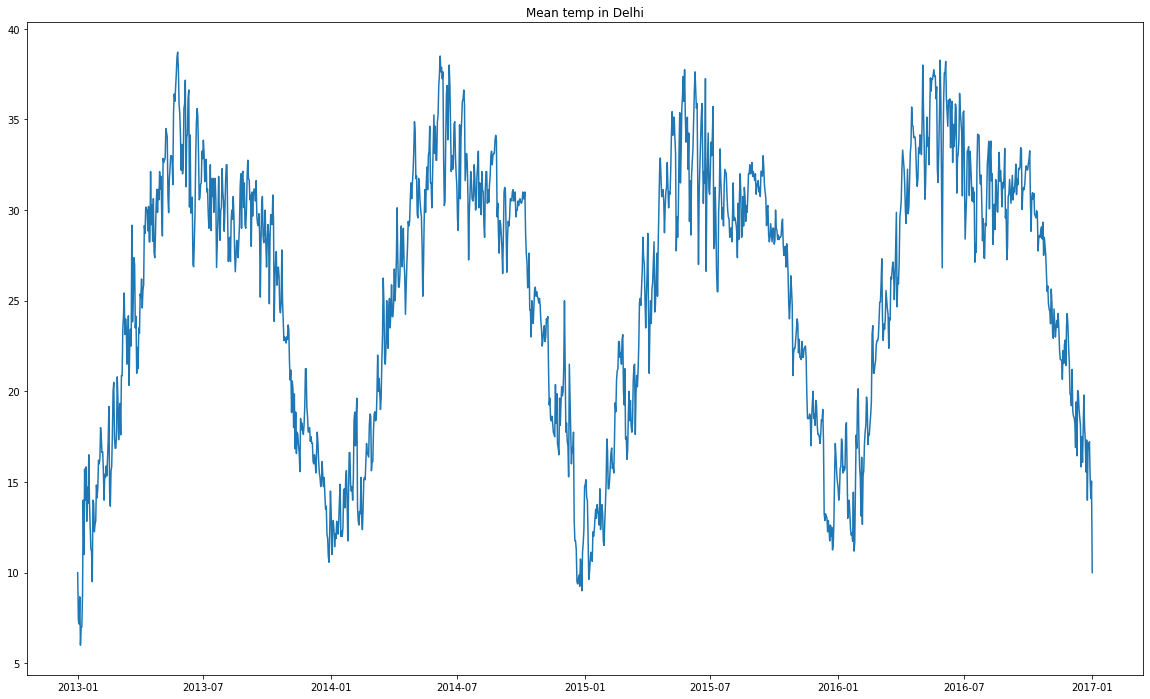

In [25]:
plt.figure(figsize=(20,12))
plt.plot(train['date'], train['meantemp'])
plt.title('Mean temp in Delhi')
plt.show()

In [26]:
fig2 = px.line(train, x='date', y='humidity', title='Humidity in Delhi')
fig2.show()

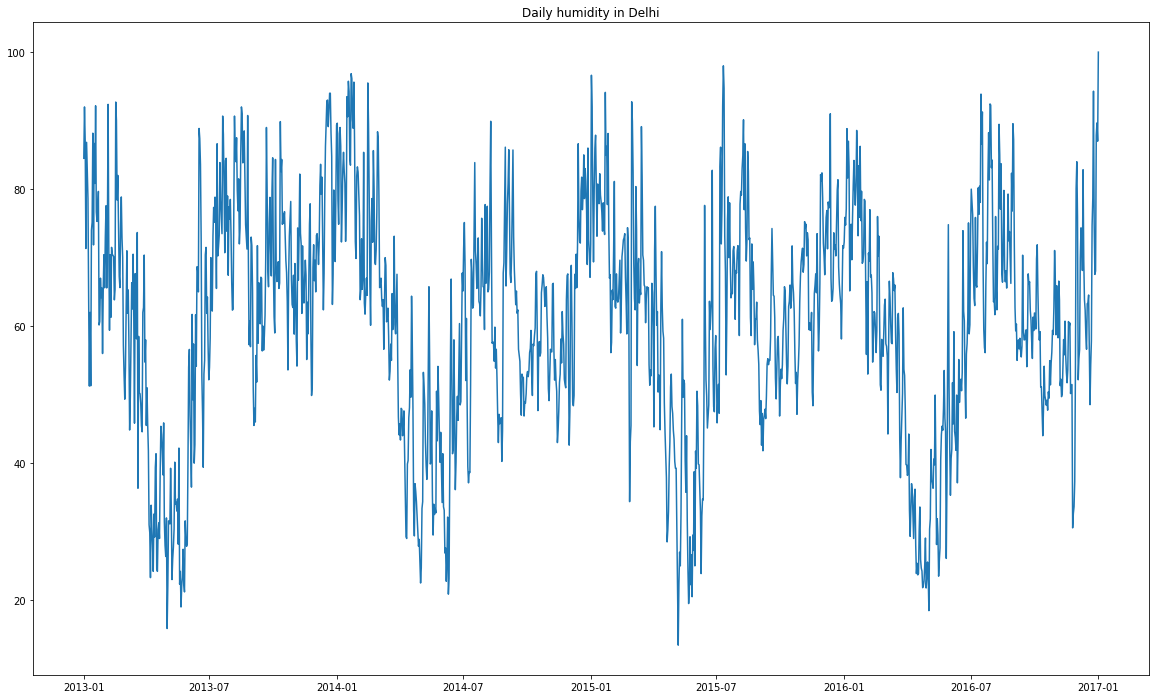

In [27]:
plt.figure(figsize=(20,12))
plt.plot(train['date'], train['humidity'])
plt.title('Daily humidity in Delhi')
plt.show()

In [28]:
fig3 = px.line(train, x='date', y='wind_speed', title='Daily wind speed in Delhi')
fig3.show()

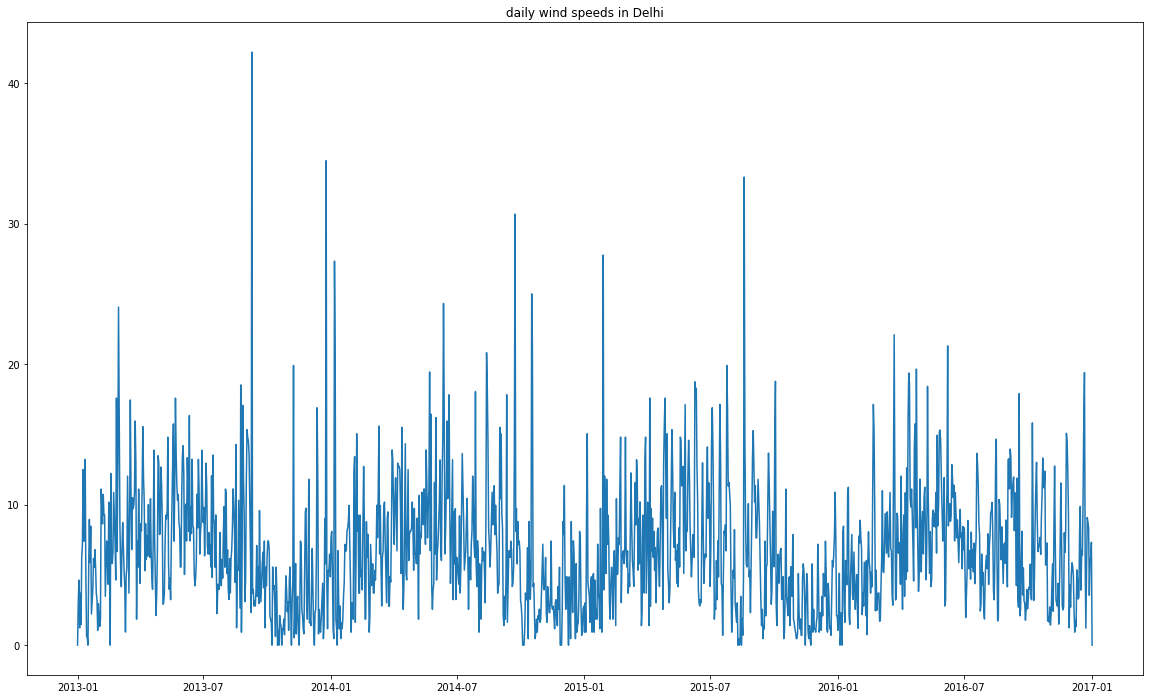

In [29]:
plt.figure(figsize=(20,12))
plt.plot(train['date'], train['wind_speed'])
plt.title('daily wind speeds in Delhi')
plt.show()

In [30]:
fig4 = px.scatter(train, x='humidity', y='meantemp', size='meantemp', trendline='ols', title='Relationship between temperature and humidity')
fig4.show()

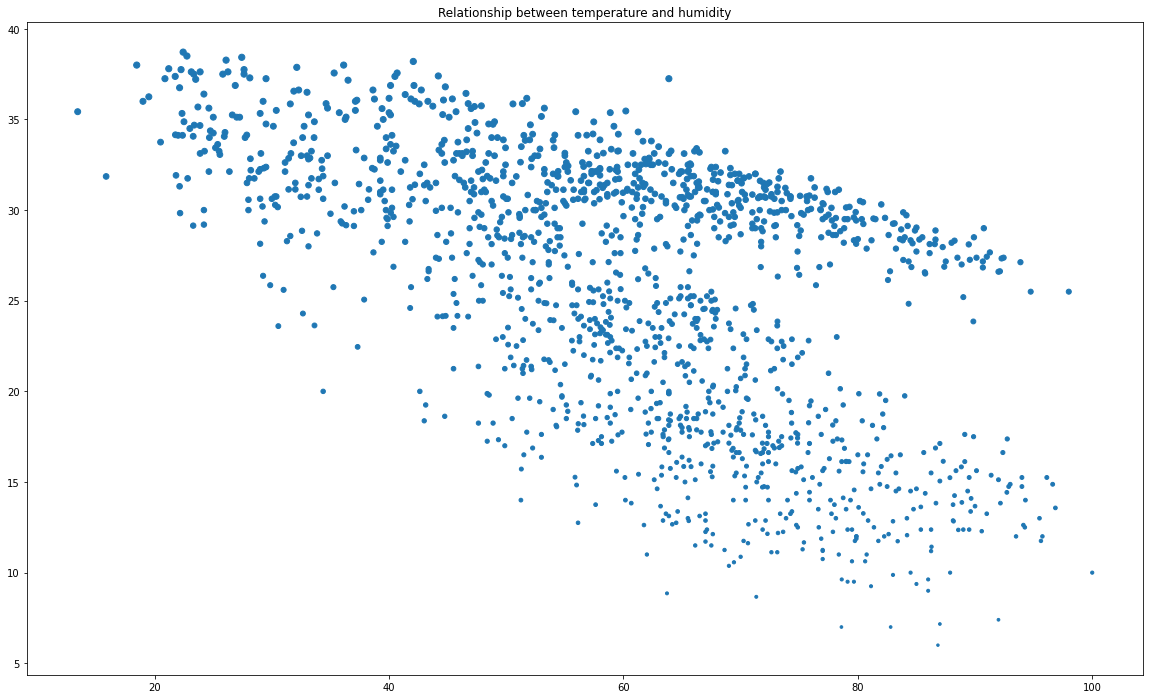

In [32]:
plt.figure(figsize=(20,12))
plt.scatter(x=train['humidity'], y=train['meantemp'], s=train['meantemp'])
plt.title('Relationship between temperature and humidity')
plt.show()

In [33]:
train['year'] = train['date'].dt.year
train['month'] = train['date'].dt.month

In [34]:
train.head()

,date,meantemp,humidity,wind_speed,meanpressure,year,month
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,2013,1
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,2013,1
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,2013,1
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,2013,1
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,2013,1


In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1462 non-null   datetime64[ns]
 1   meantemp      1462 non-null   float64       
 2   humidity      1462 non-null   float64       
 3   wind_speed    1462 non-null   float64       
 4   meanpressure  1462 non-null   float64       
 5   year          1462 non-null   int64         
 6   month         1462 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 80.1 KB


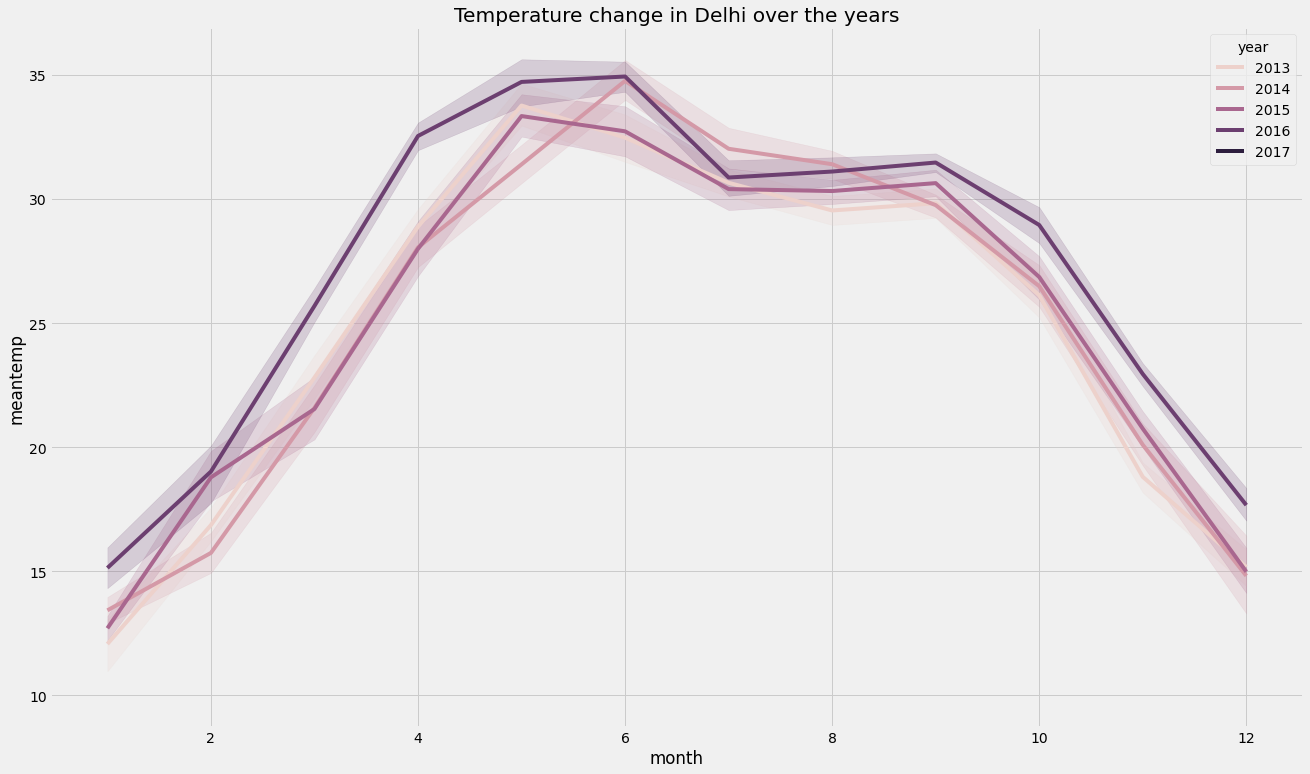

In [37]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,12))
plt.title('Temperature change in Delhi over the years')
sns.lineplot(data=train, x='month', y='meantemp', hue='year')
plt.show()

In [47]:
df = train.copy()

In [50]:
df = df[['date', 'meantemp']]

In [52]:
df.columns=(['ds', 'y'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1462 non-null   datetime64[ns]
 1   y       1462 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 23.0 KB


In [55]:
model = Prophet()
model.fit(df)
forecast = model.make_future_dataframe(periods=365)
pred = model.predict(forecast)
plot_plotly(model, pred)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmot2z024/0lvn_j_p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmot2z024/gmvk8mp4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27473', 'data', 'file=/tmp/tmpmot2z024/0lvn_j_p.json', 'init=/tmp/tmpmot2z024/gmvk8mp4.json', 'output', 'file=/tmp/tmpmot2z024/prophet_model3_qo78n9/prophet_model-20221209185631.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:56:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:56:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
